# Assignment No.1 --KNN 

## Data Dictionary

## Import libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:/Users/delll/Desktop/Python/DataSets/glass.xls")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.shape

(214, 10)

In [4]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
#There are no null values in dataset

In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [18]:
df.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

2    0.355140
1    0.327103
6    0.177570
3    0.079439
5    0.060748
Name: Type, dtype: float64


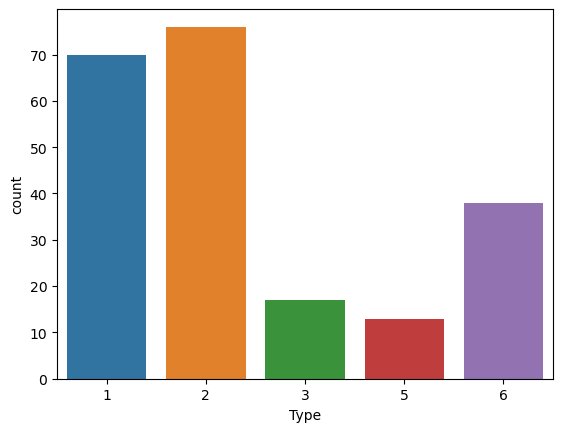

In [22]:
print(df["Type"].value_counts(normalize=True))
sns.countplot(x=df["Type"])
plt.show()
# the 1 and 2 type glass available most

In [19]:
#There are 6 different type of glasses.
#1,2,3,5,6,7

In [20]:
df["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

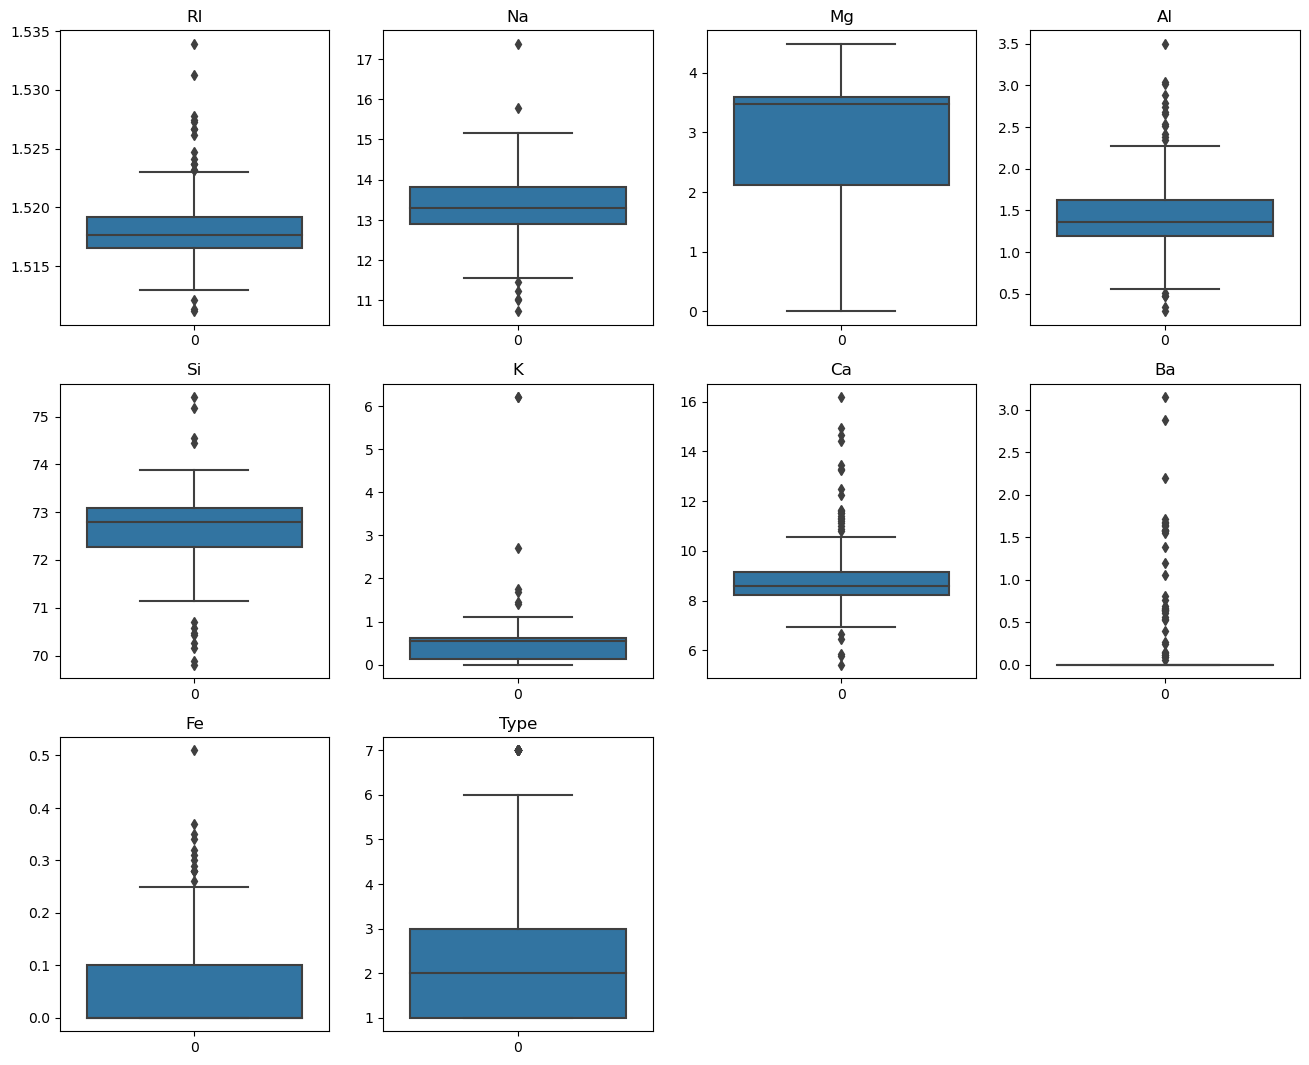

In [10]:
i=1
plt.figure(figsize=(16,13))
for col in df.columns:
    plt.subplot(3,4,i)
    sns.boxplot(df[col])
    plt.title(col)
    i=i+1

In [25]:
# only Mg is not having outliers
#So remove the outlier with the help of winsorizer

In [13]:
from feature_engine.outliers import Winsorizer
cols=['RI', 'Na', 'Al', 'Si', 'K', 'Ca', 'Fe', 'Type']
for col in cols:
    winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=col,tail="both")
    df[col]=winsor.fit_transform(df[[col]])

In [19]:
# Ba col is having too many outlier so drop this col
df.drop("Ba",axis=1,inplace=True)

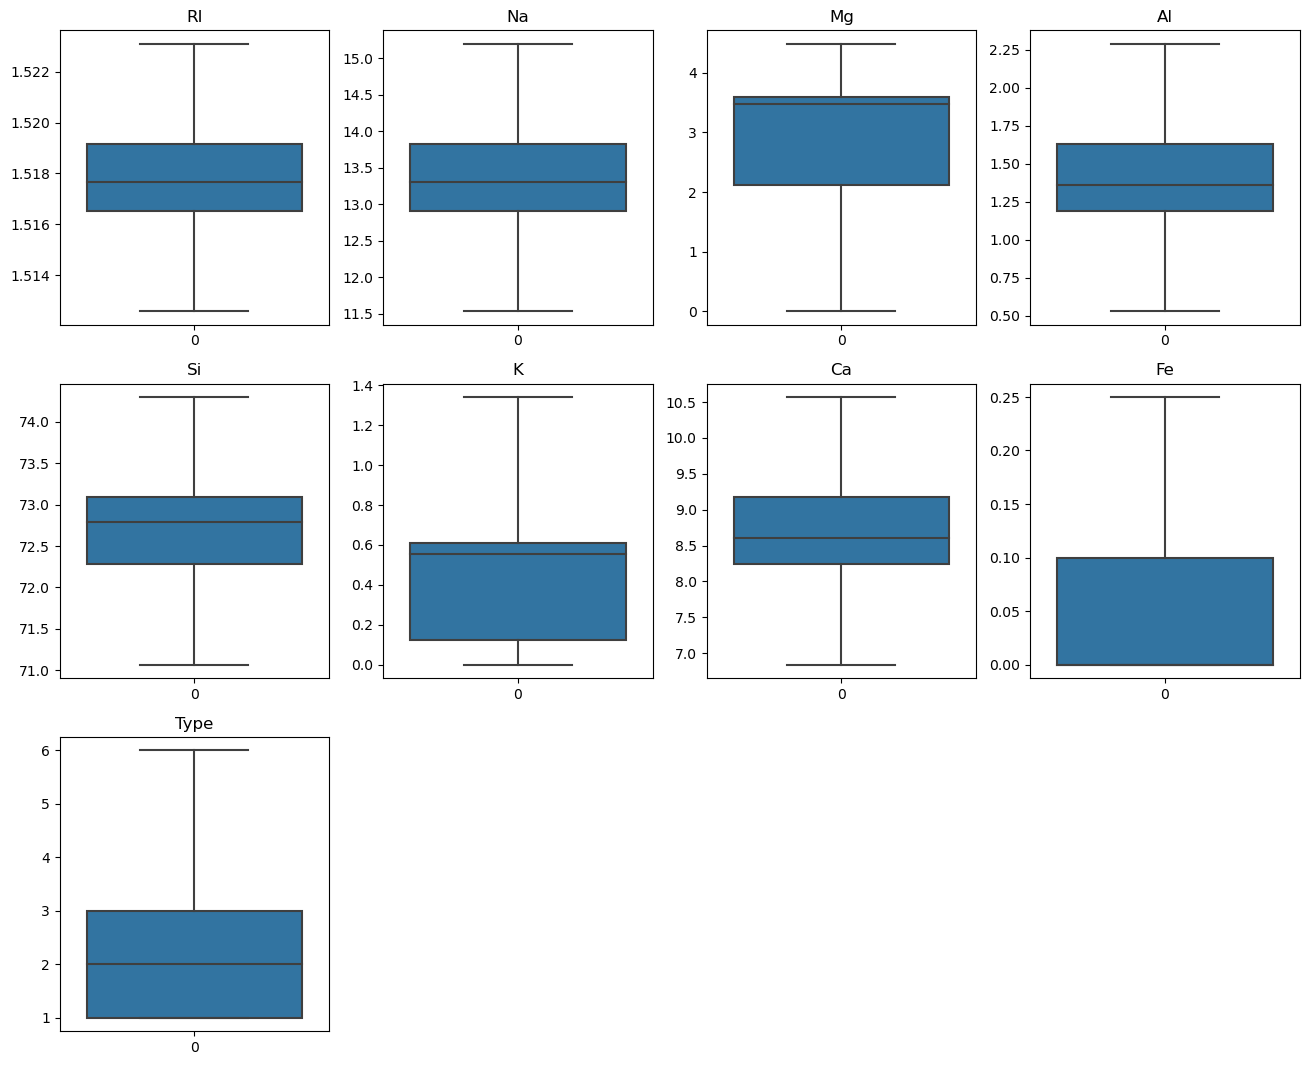

In [20]:
i=1
plt.figure(figsize=(16,13))
for col in df.columns:
    plt.subplot(3,4,i)
    sns.boxplot(df[col])
    plt.title(col)
    i=i+1
# outliers are removed

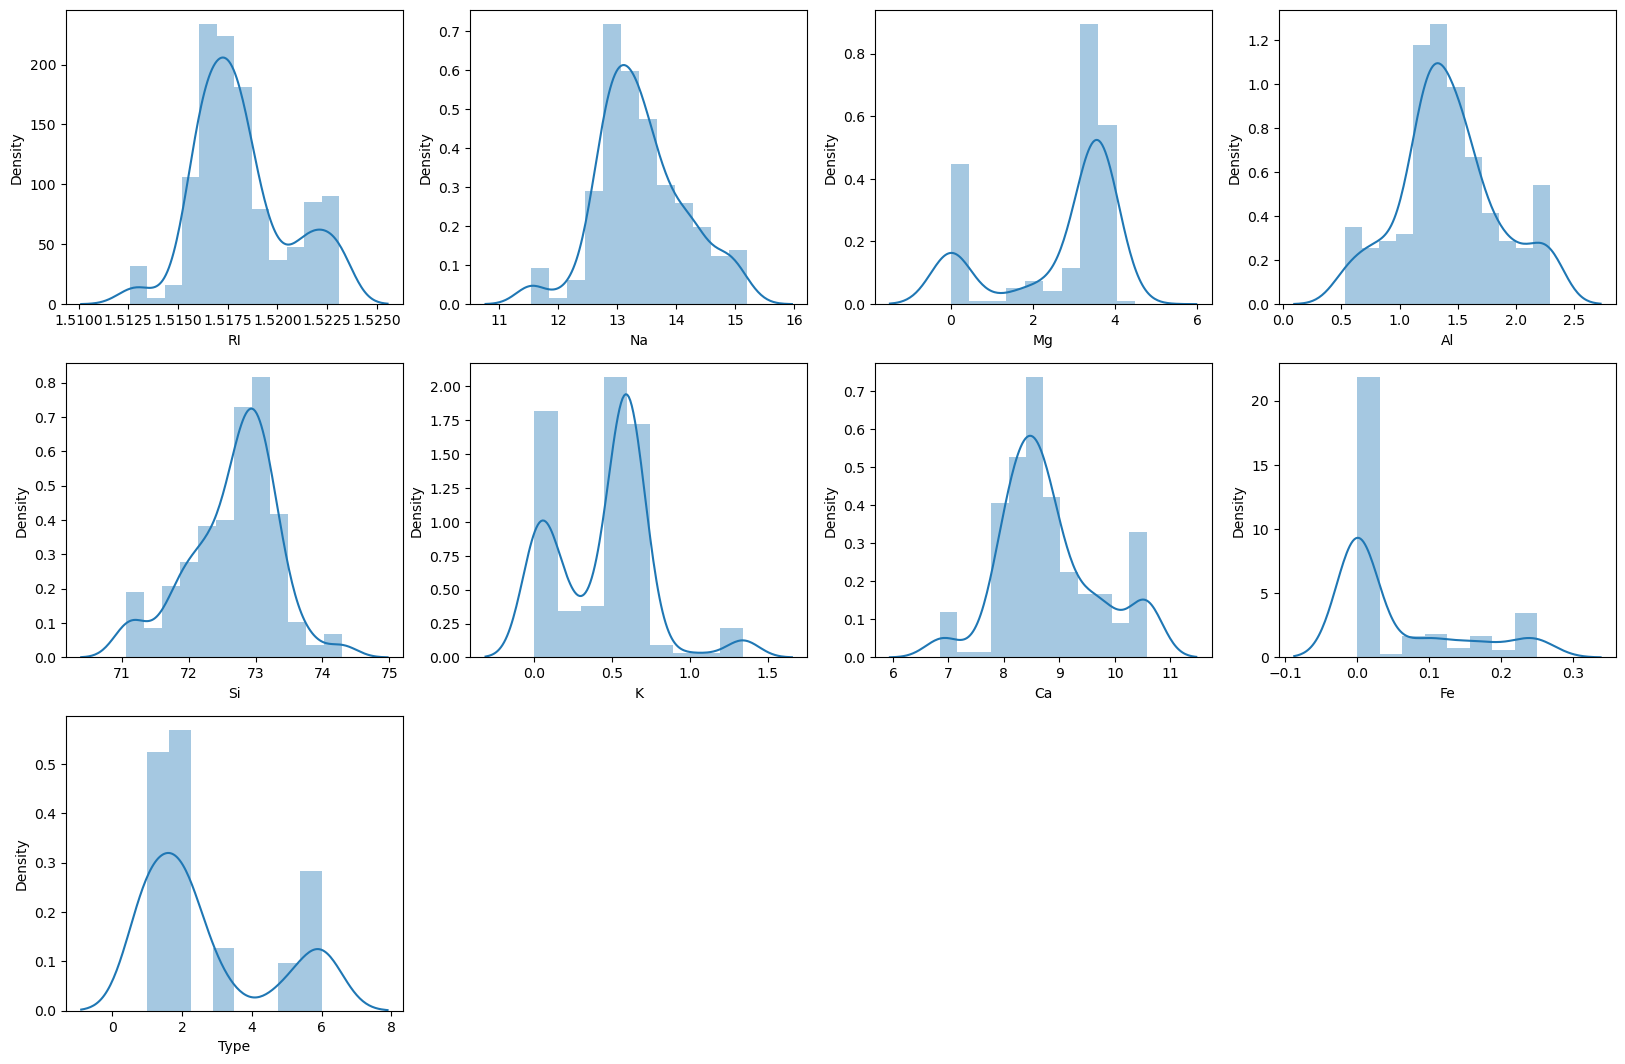

In [25]:
i=1
plt.figure(figsize=(20,13))
for col in df.columns:
    plt.subplot(3,4,i)
    sns.distplot(df[col])
    i=i+1

## Bivariate Analysis

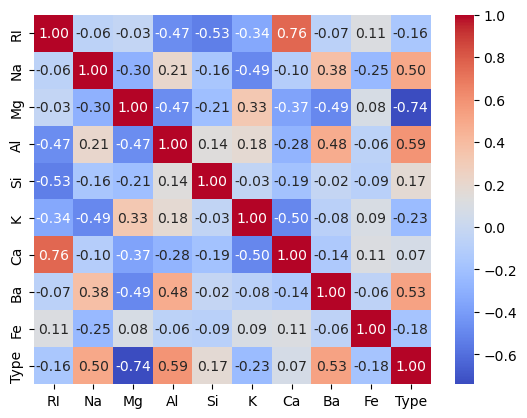

In [38]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

In [39]:
#Most of the features are indenpedent to each other

In [26]:
x=df.drop('Type',axis=1)
y=df.Type

## Normalization

In [27]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return x
df_norm=norm_fun(x)
b=df_norm.describe()

In [28]:
df_norm.head()

,RI,Na,Mg,Al,Si,K,Ca,Fe
0,0.800759,0.574591,1.000000,0.323864,0.220201,0.044734,0.511729,0.0
1,0.478178,0.642711,0.801782,0.471591,0.514319,0.357875,0.265080,0.0
2,0.342505,0.544619,0.790646,0.573864,0.594814,0.290774,0.251676,0.0
3,0.482922,0.457425,0.821826,0.431818,0.477167,0.424977,0.369638,0.0
4,0.460152,0.473774,0.806236,0.403409,0.622678,0.410065,0.329424,0.0


In [29]:
x=df_norm

## Split the data into training and testing set

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Apply the KNN Classifier

In [31]:
knn=KNeighborsClassifier(n_neighbors=5)

In [32]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
y_pred=knn.predict(x_test)

In [34]:
y_pred

array([1, 1, 1, 1, 1, 6, 1, 2, 1, 5, 1, 1, 2, 1, 2, 1, 2, 1, 6, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 6, 1, 2, 2, 1, 1, 2, 2, 1, 2, 5, 1, 2, 2, 1],
      dtype=int64)

## Evaluate the Model

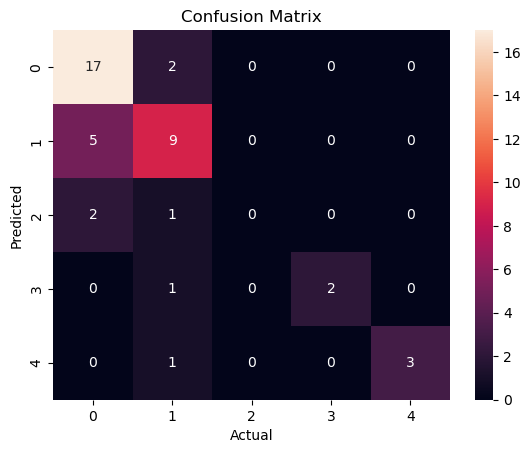

In [35]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

In [36]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
# accuracy score=72%.

0.7209302325581395


## End of the Assignement